# Advanced

---

## Plotting with Collections [Code](https://github.com/FlorianShepherd/pandapower-youtube/blob/master/scripts/advanced_plot.py) | [Documentation](https://github.com/e2nIEE/pandapower/blob/master/tutorials/plotting_basic.ipynb)

<a href="http://www.youtube.com/watch?feature=player_embedded&v=4LQLZQWPaPM" target="_blank">
    <img 
        src="http://img.youtube.com/vi/4LQLZQWPaPM/0.jpg" 
        alt="Easy plotting Youtube Video" width="240" height="180" border="10" 
    />
</a>

The number of given colors (1) is smaller than the number of nodes (179) to draw! The colors will be repeated to fit.


AttributeError: 'str' object has no attribute 'name'

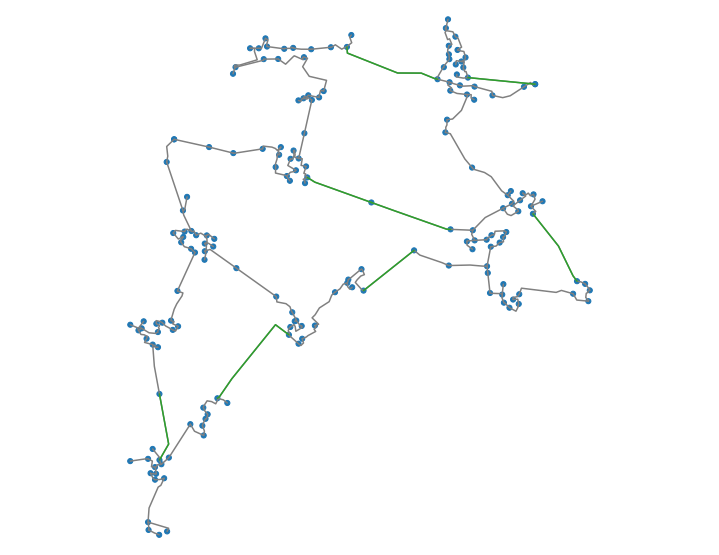

In [9]:
import pandapower.networks as nw
import pandapower.plotting as plot
import matplotlib.pyplot as plt
import seaborn

colors = seaborn.color_palette()

net = nw.mv_oberrhein()
bc = plot.create_bus_collection(net, buses=net.bus.index, color=colors[0], size=80, zorder=1)
lc = plot.create_line_collection(net, lines=net.line.index, color='grey', zorder=2)

# To highlight long lines
long_lines = net.line.loc[net.line.length_km > 2.].index
lcl = plot.create_line_collection(net, lines=long_lines, color=colors[2], zorder=2)
plot.draw_collections([lc, bc, lcl])
plt.show()

---

## N-1 Analysis [Code](https://github.com/FlorianShepherd/pandapower-youtube/blob/master/scripts/n_1_analysis.py)

<a href="http://www.youtube.com/watch?feature=player_embedded&v=mjlSx-MYmY4" target="_blank">
    <img 
        src="http://img.youtube.com/vi/mjlSx-MYmY4/0.jpg" 
        alt="Easy plotting Youtube Video" width="240" height="180" border="10" 
    />
</a>

In [10]:
import pandapower as pp
import pandapower.networks as nw
import pandapower.plotting as pplt
import matplotlib.pyplot as plt

net = nw.create_cigre_network_mv()
print(net.line)

          name        std_type  from_bus  ...  parallel  type  in_service
0     Line 1-2  CABLE_CIGRE_MV         1  ...         1    cs        True
1     Line 2-3  CABLE_CIGRE_MV         2  ...         1    cs        True
2     Line 3-4  CABLE_CIGRE_MV         3  ...         1    cs        True
3     Line 4-5  CABLE_CIGRE_MV         4  ...         1    cs        True
4     Line 5-6  CABLE_CIGRE_MV         5  ...         1    cs        True
5     Line 7-8  CABLE_CIGRE_MV         7  ...         1    cs        True
6     Line 8-9  CABLE_CIGRE_MV         8  ...         1    cs        True
7    Line 9-10  CABLE_CIGRE_MV         9  ...         1    cs        True
8   Line 10-11  CABLE_CIGRE_MV        10  ...         1    cs        True
9     Line 3-8  CABLE_CIGRE_MV         3  ...         1    cs        True
10  Line 12-13    OHL_CIGRE_MV        12  ...         1    ol        True
11  Line 13-14    OHL_CIGRE_MV        13  ...         1    ol        True
12    Line 6-7  CABLE_CIGRE_MV        

In [11]:
# limits
vmax = 1.05
vmin = .95
max_ll = 100.

lines = net.line.index
critical = list()

for l in lines:
    net.line.loc[l, "in_service"] = False
    pp.runpp(net)

    if net.res_bus.vm_pu.max() > vmax or net.res_bus.vm_pu.min() < vmin or \
        net.res_line.loading_percent.max() > max_ll:
        critical.append(l)
    net.line.loc[l, "in_service"] = True

print(critical)

[3, 4, 5, 7, 8, 10, 11, 12, 13, 14]


<AxesSubplot:>

AttributeError: 'str' object has no attribute 'name'

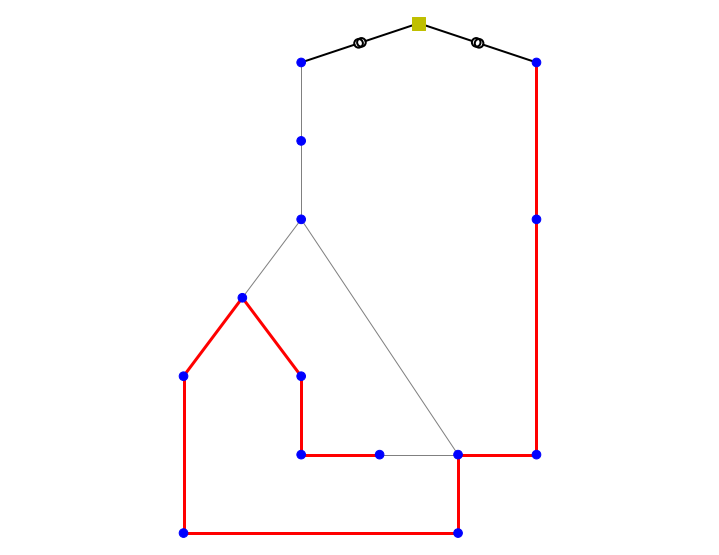

In [12]:
ax = pplt.simple_plot(net, show_plot=False)
clc = pplt.create_line_collection(net, critical, color="r", linewidth=3., use_bus_geodata=True)
pplt.draw_collections([clc], ax=ax)

---

## Highlight Feeder [Code](https://github.com/FlorianShepherd/pandapower-youtube/blob/master/scripts/feeder_buses.py) | [Documentation](https://github.com/e2nIEE/pandapower/blob/master/tutorials/plotting_basic.ipynb)

<a href="http://www.youtube.com/watch?feature=player_embedded&v=QYDp_-TX7C4" target="_blank">
    <img 
        src="http://img.youtube.com/vi/QYDp_-TX7C4/0.jpg" 
        alt="Easy plotting Youtube Video" width="240" height="180" border="10" 
    />
</a>

AttributeError: 'str' object has no attribute 'name'

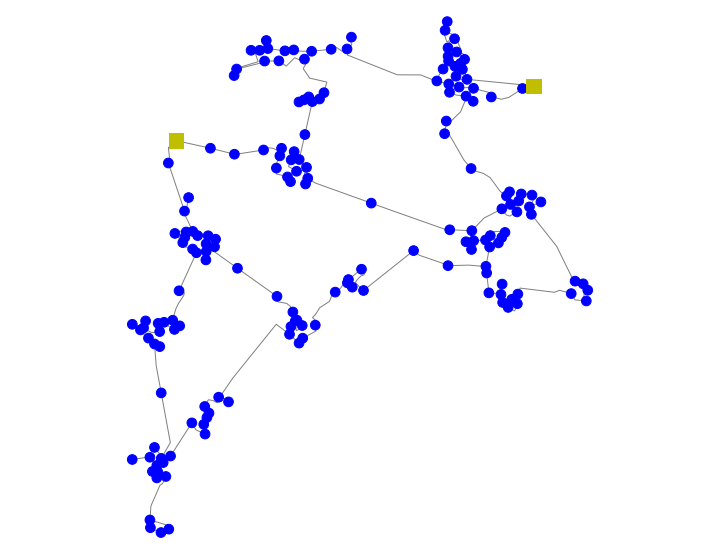

<AxesSubplot:>

In [13]:
import pandapower as pp
import pandapower.plotting as pplt
import pandapower.topology as top
import pandapower.networks as nw
import matplotlib.pyplot as plt
import seaborn as sns

net = nw.mv_oberrhein()
pplt.simple_plot(net)

The number of given colors (1) is smaller than the number of nodes (63) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (44) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (36) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (32) to draw! The colors will be repeated to fit.


{'bus': 152.66075572500006, 'ext_grid': 228.9911335875001, 'switch': 305.3215114500001, 'switch_distance': 305.3215114500001, 'load': 152.66075572500006, 'sgen': 152.66075572500006, 'trafo': 152.66075572500006}


<AxesSubplot:>

AttributeError: 'str' object has no attribute 'name'

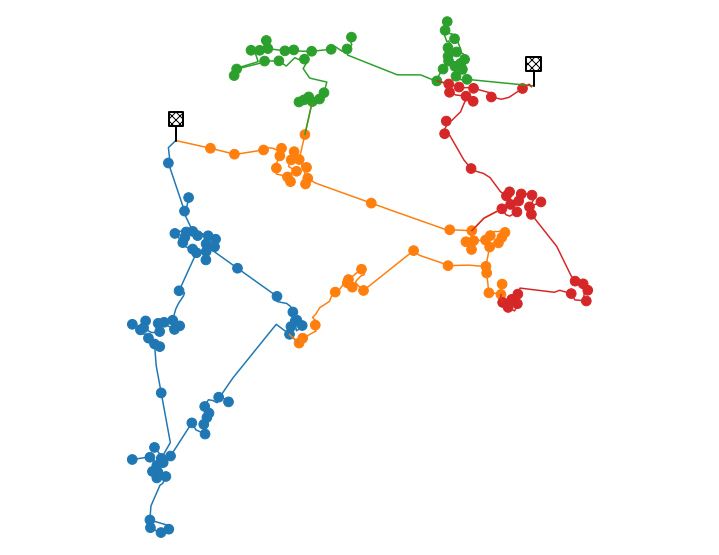

In [20]:
# using topology package
mg = top.create_nxgraph(net, nogobuses=set(net.trafo.lv_bus.values) | set(net.trafo.hv_bus.values))
colors = sns.color_palette()
collections = list()
sizes = pplt.get_collection_sizes(net)
print(sizes)
for area, color in zip(top.connected_components(mg), colors):
    collections.append(pplt.create_bus_collection(net, area, color=color, size=sizes["bus"]))
    line_ind = net.line.loc[:, "from_bus"].isin(area) | net.line.loc[:, "to_bus"].isin(area)
    lines = net.line.loc[line_ind].index
    collections.append(pplt.create_line_collection(net, lines, color=color))
collections.append(pplt.create_ext_grid_collection(net, size=sizes["ext_grid"]))
pplt.draw_collections(collections)

---